# Home Work #1:

**The R data in this homwork comes from GitHub and is linked below** 
> <a href="https://github.com/robjhyndman/fpp3package" title="fpp3package">fpp3package</a>
 & <a href="https://github.com/tidyverts/tsibbledata/" title="Wikipedia">tsibbledata</a>


**Links to documentaion for packages used**

> Pandas timeseries documention:
>https://pandas.pydata.org/docs/user_guide/timeseries.html

> Statsmodel Time Series analysis:
>https://www.statsmodels.org/stable/tsa.html

> A Python package to read and write R RData and Rds files into/from pandas data frames:
>https://pypi.org/project/pyreadr/

## Prepare Work space: 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
from matplotlib import pyplot

import pyreadr
 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, month_plot , quarter_plot , seasonal_plot

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")


## 2.10 Exercises

### Question 3:

In [2]:
# Read in the data 
# https://github.com/RamiKrispin/USgas 

data = pd.read_csv("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/tute1.csv")
                        
print("Shape of the data  "+ str(data.shape))
data.head()


Shape of the data  (100, 4)


,Quarter,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


In [3]:
# Turn data into time series 
df = pd.DataFrame(data=data)
df = df.set_index('Quarter')
df.index = pd.to_datetime(df.index)

print("Shape of the data  "+ str(df.shape))
df.head()


Shape of the data  (100, 3)


,Sales,AdBudget,GDP
Quarter,,,
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1


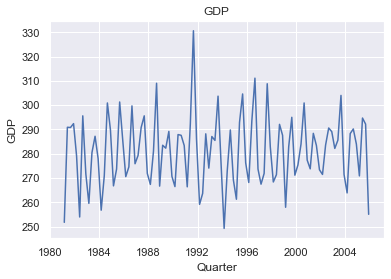

In [4]:
sns.lineplot(x="Quarter", y="GDP",data=df)
plt.title("GDP")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


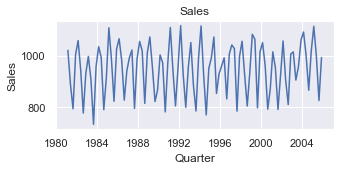

In [5]:
sns.lineplot(x="Quarter", y="Sales",data=df)
plt.title("Sales")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


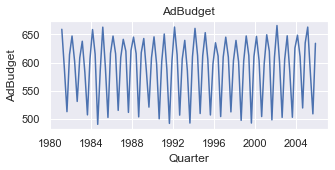

In [6]:
sns.lineplot(x="Quarter", y="AdBudget",data=df)
plt.title("AdBudget")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


### Question 4:

In [7]:
# read in the .rda file using pyreadr package  

result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/us_total.rda") # also works for RData
print(result.keys()) # check the objects  
df4 = result["us_total"] # extract the dataframe obeject

print("shape of data:"+str(df4.shape)) 
df4.head()# check data read in correctly 
#df4 = df4.set_index('year') # set index 
df4.head()


odict_keys(['us_total'])
shape of data:(1266, 3)


,year,state,y
0,1997,Alabama,324158
1,1998,Alabama,329134
2,1999,Alabama,337270
3,2000,Alabama,353614
4,2001,Alabama,332693


In [8]:
# creat data Hierarchy and creat new england data set  
options = ["Massachusetts","Maine", "Rhode Island", "Connecticut", "Vermont", "New Hampshire"]
newengland = df4.loc[df4['state'].isin(options)]

newengland.set_index(['state','year'],inplace=True)

print("Shape of the data  "+ str(newengland.shape))
newengland.head()


Shape of the data  (138, 1)


y
state       year        
Connecticut 1997  144708
            1998  131497
            1999  152237
            2000  159712
            2001  146278

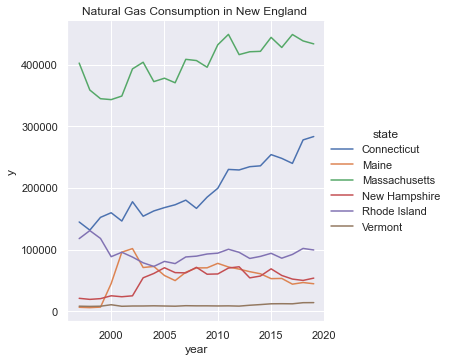

In [9]:
# Plot 

sns.relplot(
    data=newengland,
    x="year", y="y",
    hue="state", 
    #col="align",
    kind="line",
    #facet_kws=dict(sharex=False),
)
plt.title('Natural Gas Consumption in New England ')
plt.show()


##  Question 9 

**US_employment** 

In [10]:
# load in the data 
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/us_employment.rda")
print(result.keys()) # check the objects  
us_employment=result["us_employment"]
df5 = us_employment

options = ["Total Private"]
employed = df5.loc[df5['Title'].isin(options)]

employed = employed["Employed"]

print("shape of data:"+str(df5.shape)) 
df5  # check data read in correctly 

# The Month variable has some issues 
# we will have to create a new time index from scratch 
# negative numbers and appears to be float type
# # we only need the "total private employed "

odict_keys(['us_employment'])
shape of data:(143412, 4)


,Month,Series_ID,Title,Employed
0,-11323.0,CEU0500000001,Total Private,25338.0
1,-11292.0,CEU0500000001,Total Private,25447.0
2,-11264.0,CEU0500000001,Total Private,25833.0
3,-11233.0,CEU0500000001,Total Private,25801.0
4,-11203.0,CEU0500000001,Total Private,26113.0
...,...,...,...,...
143407,18017.0,TEMPHELPN,"All Employees, Temporary Help Services",3009.5
143408,18048.0,TEMPHELPN,"All Employees, Temporary Help Services",3025.7
143409,18078.0,TEMPHELPN,"All Employees, Temporary Help Services",2965.9
143410,18109.0,TEMPHELPN,"All Employees, Temporary Help Services",3040.0


In [11]:
# grab the rows with total private unemployment

options = ["Total Private"]
tot_private = df5.loc[df5['Title'].isin(options)]


# drop usless information 
tot_private = tot_private.drop(['Series_ID', 'Title',"Month"], axis=1)


#create new date time index because the orignal one had some issues 
dti = pd.date_range("1942-01-01", periods=969, freq="m")
#set new index 
tot_private.set_index(dti,inplace=True)

tot_private


,Employed
1942-01-31,25338.0
1942-02-28,25447.0
1942-03-31,25833.0
1942-04-30,25801.0
1942-05-31,26113.0
...,...
2022-05-31,128771.0
2022-06-30,129800.0
2022-07-31,129883.0
2022-08-31,129930.0


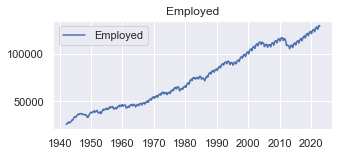

In [12]:
#line plot 
sns.lineplot(data=tot_private)
plt.title("Employed")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


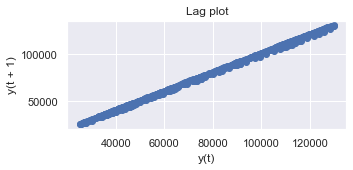

In [13]:
#lag plot
s=pd.Series(tot_private['Employed'],index=tot_private.index)
pd.plotting.lag_plot(s, lag=1)
plt.title("Lag plot")
plt.rcParams["figure.figsize"] = (20,5)
plt.show()


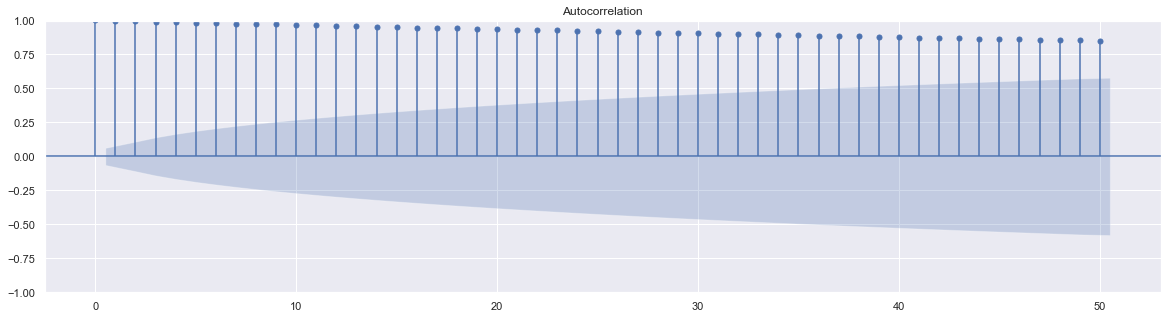

In [14]:


# Draw Plot

fig1 =plot_acf(tot_private, lags=50)
plt.show()


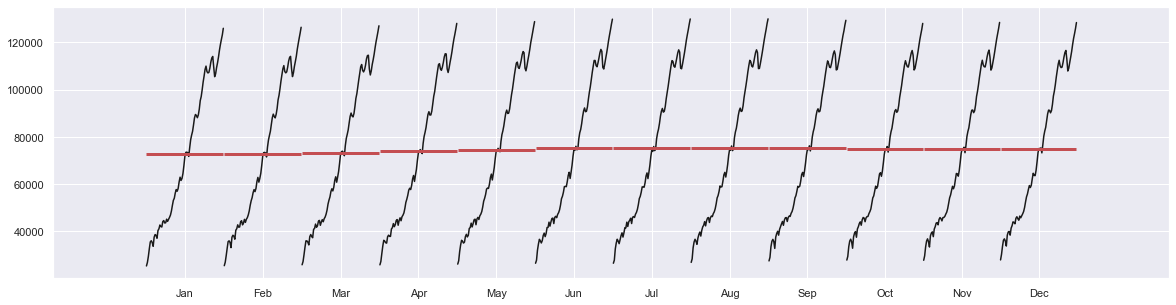

In [15]:
fig2 = month_plot(tot_private)
plt.show()


Text(0, 0.5, 'Employed')

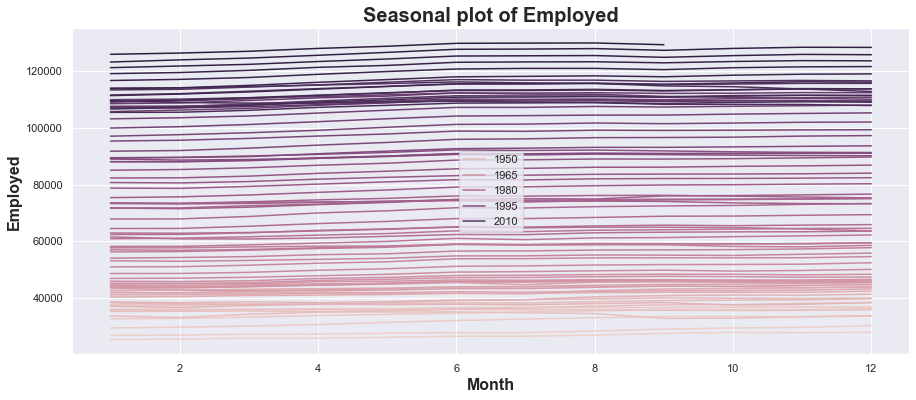

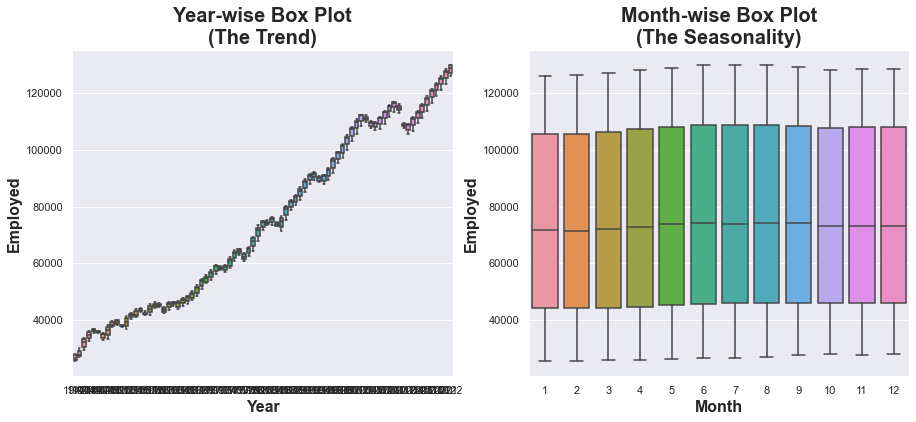

In [16]:
variable = 'Employed'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(tot_private.index.month, tot_private[variable], hue=tot_private.index.year)
ax.set_title('Seasonal plot of Employed', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Employed', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(tot_private.index.year ,tot_private[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Employed', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(tot_private.index.month, tot_private[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Employed', fontsize = 16, fontdict=dict(weight='bold'))


 **Analysis of data** 
>The data shows a very strong postive trend. All of the plots show that there is a strong trend, even the auto correlation plot is showing this because all of the lags are correlated with eachother. There also seems to be a fairly week seasonal trend in there with the middle of the year being higher than either of the ends. The data is probably already seasonally adjusted because most economic data is. There seems to be a 5-10 year long cycle that starts up in 1975. The only year that is out of the ordinay is around 2008 this is probably because of the financial crisis. 

### Bricks 

In [17]:
# load in the data 
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/aus_production.rda")
print(result.keys()) # check the objects  
aus_production=result["aus_production"]


#Quartly data 
# time index read in improperly 
# there are missinng values 


# from aus_production[194:217] is null s we can just drop those observations 

# amount of missing data
print("Missing values = " + str(aus_production.isnull().sum()))
aus_production


odict_keys(['aus_production'])
Missing values = Quarter         0
Beer            0
Tobacco        24
Bricks         20
Cement          0
Electricity     0
Gas             0
dtype: int64


,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,-5114.0,284.0,5225.0,189.0,465.0,3923.0,5.0
1,-5023.0,213.0,5178.0,204.0,532.0,4436.0,6.0
2,-4932.0,227.0,5297.0,208.0,561.0,4806.0,7.0
3,-4840.0,308.0,5681.0,197.0,570.0,4418.0,6.0
4,-4748.0,262.0,5577.0,187.0,529.0,4339.0,5.0
...,...,...,...,...,...,...,...
213,14335.0,398.0,NaN,NaN,2160.0,57471.0,238.0
214,14426.0,419.0,NaN,NaN,2325.0,58394.0,252.0
215,14518.0,488.0,NaN,NaN,2273.0,57336.0,210.0
216,14610.0,414.0,NaN,NaN,1904.0,58309.0,205.0


In [18]:
#double check missing values are gone 
aus_prod=aus_production[0:194]
print("Missing values = " + str(aus_prod['Bricks'].isnull().sum()))

#create new date time index because the orignal one had some issues 
dti = pd.date_range("1972-01-01", periods=194, freq="q")
#set new index 
aus_prod.set_index(dti,inplace=True)

# drop usless information
aus_prod = aus_prod.drop(['Quarter', 'Beer',"Tobacco","Cement","Electricity","Gas"], axis=1)

aus_prod


Missing values = 0


,Bricks
1972-03-31,189.0
1972-06-30,204.0
1972-09-30,208.0
1972-12-31,197.0
1973-03-31,187.0
...,...
2019-06-30,415.0
2019-09-30,440.0
2019-12-31,413.0
2020-03-31,409.0


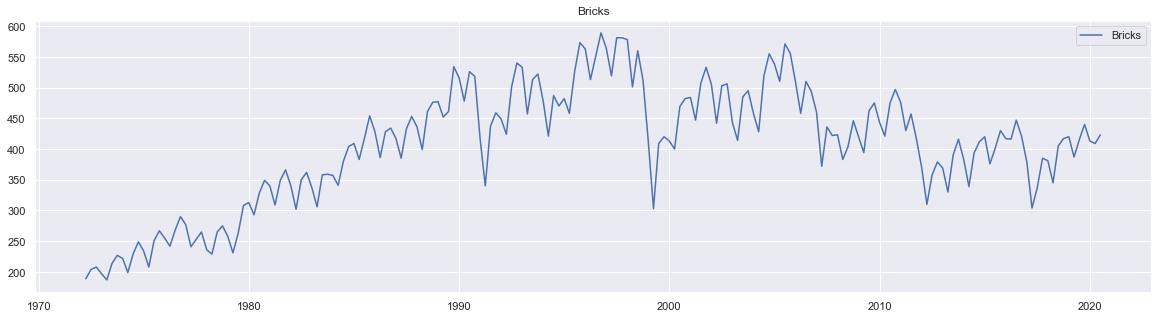

In [19]:
#line plot 
sns.lineplot(data=aus_prod)
plt.title("Bricks")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


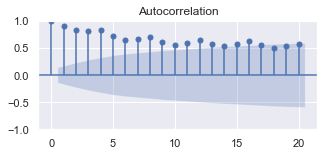

In [20]:
# Draw Plot

plot_acf(aus_prod, lags=20)
plt.show()


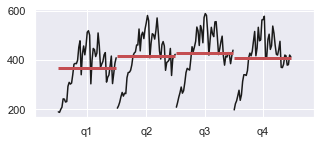

In [21]:
quarter_plot(aus_prod)
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


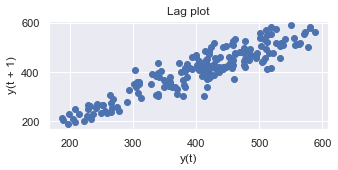

In [22]:
#lag plot
s=pd.Series(aus_prod['Bricks'],index=aus_prod.index)
pd.plotting.lag_plot(s, lag=1)
plt.title("Lag plot")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()
# make into facet with four lags and pick a year 


Text(0, 0.5, 'Bricks')

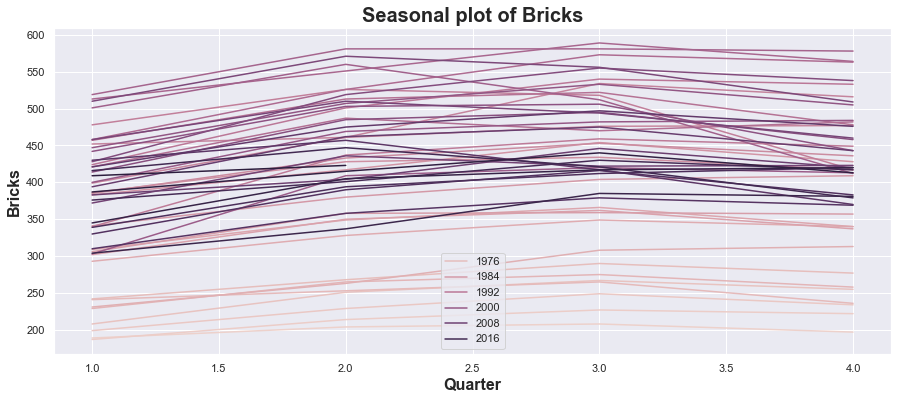

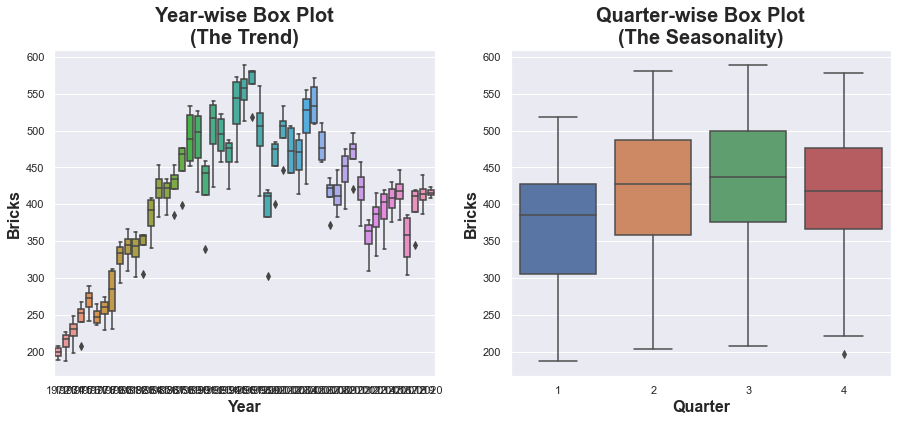

In [23]:
variable = 'Bricks'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(aus_prod.index.quarter, aus_prod[variable], hue=aus_prod.index.year)
ax.set_title('Seasonal plot of Bricks', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Quarter', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Bricks', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(aus_prod.index.year ,aus_prod[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Bricks', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(aus_prod.index.quarter, aus_prod[variable], ax=ax[1])
ax[1].set_title('Quarter-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Quarter', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Bricks', fontsize = 16, fontdict=dict(weight='bold'))


**Analysis of data set** 
> There is a sesonal trend within the data but its not super strong. Each year starts at the min then the yearly peak is in Quarter 3. There may be a cycle in the data that is about 8 years long, from 1972 to about 1990 the grow slows every 8ish years. Then after 1990 there is an actual drop in production around every 8 years. I cant tell for sure but 1999 looks to be very unusual, there is a massive drop in production that goes contrary to the prevaling trend in the data.  

## Pelt

In [24]:
# load in the data 
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/pelt.rda")
print(result.keys()) # check the objects  
pelt=result["pelt"]
# amount of missing data
print("Missing values = " + str(pelt.isnull().sum()))

pelt['Year'] = pelt['Year'].astype(int)

#pelt['Year'] = pd.to_datetime(pelt["Year"])
#pelt['Year'] = pelt['Year'].year

#pelt = pelt.set_index('Year')
#pelt.index = pd.to_datetime(pelt.index)
#pelt.index=pelt.index.year

dti = pd.date_range("1845", periods=91, freq="y")
#set new index 
pelt.set_index(dti,inplace=True)

pelt


odict_keys(['pelt'])
Missing values = Year    0
Hare    0
Lynx    0
dtype: int64


,Year,Hare,Lynx
1845-12-31,1845,19580.0,30090.0
1846-12-31,1846,19600.0,45150.0
1847-12-31,1847,19610.0,49150.0
1848-12-31,1848,11990.0,39520.0
1849-12-31,1849,28040.0,21230.0
...,...,...,...
1931-12-31,1931,19520.0,8310.0
1932-12-31,1932,82110.0,16010.0
1933-12-31,1933,89760.0,24820.0
1934-12-31,1934,81660.0,29700.0


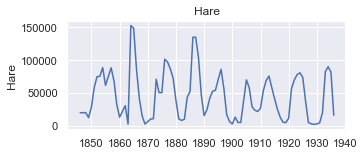

In [25]:
#line plot 
sns.lineplot(data=pelt["Hare"])
plt.title("Hare")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


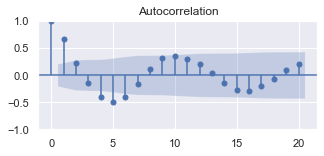

In [26]:
# Draw Plot

plot_acf(pelt['Hare'], lags=20)
plt.show()


In [27]:
# this function does not like yearly data 
#seasonal_plot(pelt['Hare'].astype(int).to_list(),xticklabels=pelt.index.to_list())
#plt.show()

In [28]:
#seasonal decompostion
#from statsmodels.tsa.seasonal import seasonal_decompose

#hare = pelt.drop(['Lynx'], axis=1)

#decompose_result_mult = seasonal_decompose(hare, model="Multiplicative")

#trend = decompose_result_mult.trend
#seasonal = decompose_result_mult.seasonal
#residual = decompose_result_mult.resid
#plt.rcParams["figure.figsize"] = (20,12)
#decompose_result_mult.plot();

#having isuess cause of time scale
# ive got no idea why 
# just gonna move on for now. will come back to fix if there is time 

**Analysis of data set** 
> This data set was much more tricky. Some of the functions that I have been using do not like that the index is yearly. From the plots I was able to create there is some evidence of a very stong seasonality and cycles. The Auto correlation plot is showing there is a strong relationship between 2 and 5 years lags. The cycles in the data are very large and happen about every decade. The cycle is most likly caused by human hunting patterns. 

## PBS 

In [29]:
# read in data 
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/PBS.rda")
print(result.keys()) # check the objects that came thru
pbs=result["PBS"]

pbs


odict_keys(['PBS'])


,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,7851.0,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228.0,67877.0
1,7882.0,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327.0,57011.0
2,7913.0,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775.0,55020.0
3,7943.0,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380.0,57222.0
4,7974.0,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371.0,52120.0
...,...,...,...,...,...,...,...,...,...
67591,13910.0,General,Safety net,Z,NaN,Z,Z,135.0,1591.0
67592,13939.0,General,Safety net,Z,NaN,Z,Z,15.0,276.0
67593,13970.0,General,Safety net,Z,NaN,Z,Z,11.0,165.0
67594,14000.0,General,Safety net,Z,NaN,Z,Z,21.0,278.0


In [30]:
#gab needed data only
options = ["H02"]
pbs = pbs.loc[pbs['ATC2'].isin(options)]
# amount of missing data
print("Missing values = " + str(pbs.isnull().sum()))

#cost to int
pbs["Cost"] = pbs["Cost"].astype(int)


dti = pd.date_range("1952-01-01", periods=816, freq="m")
#set new index 
pbs.set_index(dti,inplace=True)

# drop usless information
pbs = pbs.drop(['Month','Concession','Type','ATC1','ATC1_desc','ATC2','ATC2_desc','Scripts'], axis=1)


pbs


Missing values = Month         0
Concession    0
Type          0
ATC1          0
ATC1_desc     0
ATC2          0
ATC2_desc     0
Scripts       0
Cost          0
dtype: int64


,Cost
1952-01-31,317384
1952-02-29,269891
1952-03-31,269703
1952-04-30,280418
1952-05-31,268070
...,...
2019-08-31,11564
2019-09-30,1719
2019-10-31,3883
2019-11-30,4594


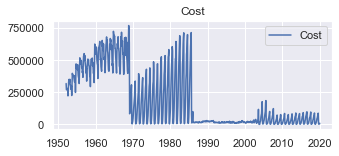

In [31]:
#line plot 
sns.lineplot(data=pbs)
plt.title("Cost")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


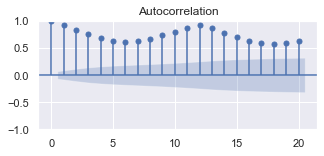

In [32]:
# Draw Plot

plot_acf(pbs, lags=20)
plt.show()


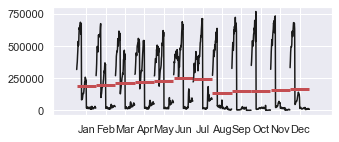

In [33]:
month_plot(pbs)
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


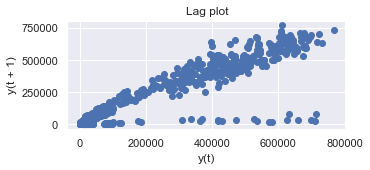

In [34]:
#lag plot
s=pd.Series(pbs['Cost'],index=pbs.index)
pd.plotting.lag_plot(s, lag=1)
plt.title("Lag plot")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


Text(0, 0.5, 'Cost')

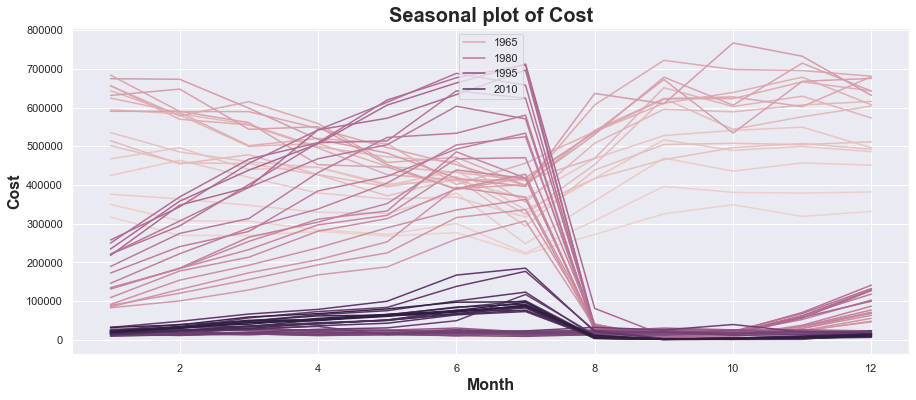

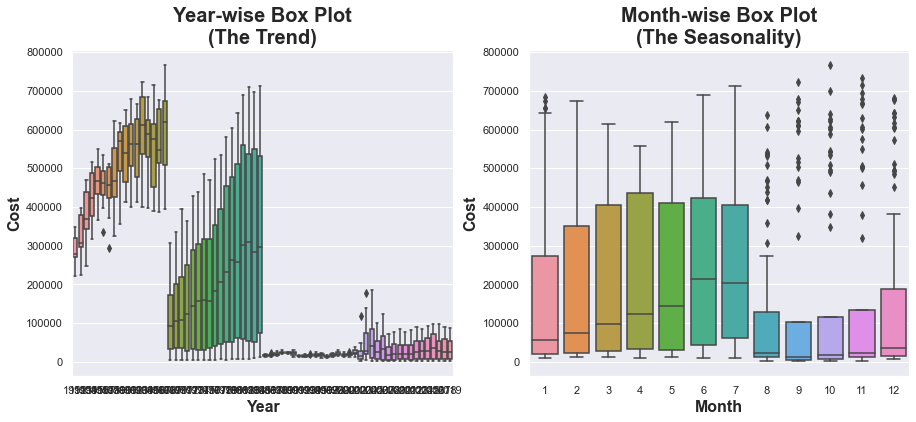

In [35]:
variable = 'Cost'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(pbs.index.month, pbs[variable], hue=pbs.index.year)
ax.set_title('Seasonal plot of Cost', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Cost', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(pbs.index.year ,pbs[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Cost', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(pbs.index.month, pbs[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Cost', fontsize = 16, fontdict=dict(weight='bold'))


**Analysis of data set** 
> This is a vey intresting data set. There dose not seem to be a very stong trend in the data, The begining is higher than the end but there are 3 distinct drops in the data. There may be a very long Cycle where the level of the data drops every 2 decades. There is defintely a strong seaonal trend but it behaved diffrently in each cycle.The first seaonal trend starts high then dips in the middle of the year then goes back up. The second seaonal pattern starts fairly low then climbs untill month 8 and dropps off violently. The last seasonal trend is simmalr to the one before but is just much less pronounced. The end of the 60s is a weird time in this data set and there is a massive drop off. Lastly this data set is a good canidate for transformation so that the variance will be stationary.


## US_gasoline

In [36]:
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/us_gasoline.rda")
print(result.keys()) # check the objects  
us_gasoline=result["us_gasoline"]
us_gasoline
# amount of missing data
#print("Missing values = " + str(pelt.isnull().sum()))


odict_keys(['us_gasoline'])


,Week,Barrels
0,7704.0,6.621
1,7711.0,6.433
2,7718.0,6.582
3,7725.0,7.224
4,7732.0,6.875
...,...,...
1350,17154.0,9.278
1351,17161.0,8.465
1352,17168.0,8.470
1353,17175.0,8.069


In [37]:
dti = pd.date_range("1995", periods=1355, freq="w")
#set new index 
us_gasoline.set_index(dti,inplace=True)

us_gasoline = us_gasoline.drop(['Week'], axis=1)

us_gasoline


,Barrels
1995-01-01,6.621
1995-01-08,6.433
1995-01-15,6.582
1995-01-22,7.224
1995-01-29,6.875
...,...
2020-11-15,9.278
2020-11-22,8.465
2020-11-29,8.470
2020-12-06,8.069


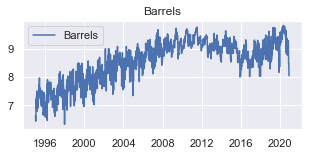

In [38]:
#line plot 
sns.lineplot(data=us_gasoline)
plt.title("Barrels")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


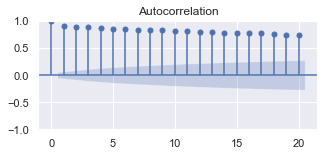

In [39]:
# Draw Plot

plot_acf(us_gasoline, lags=20)
plt.show()


Text(0, 0.5, 'Barrels')

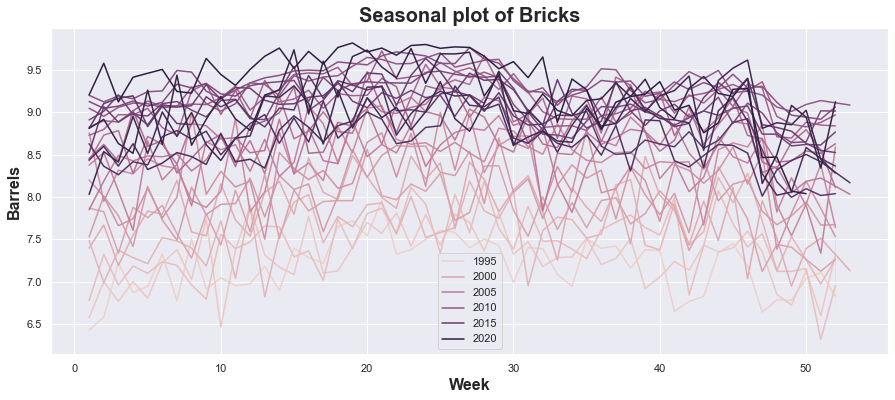

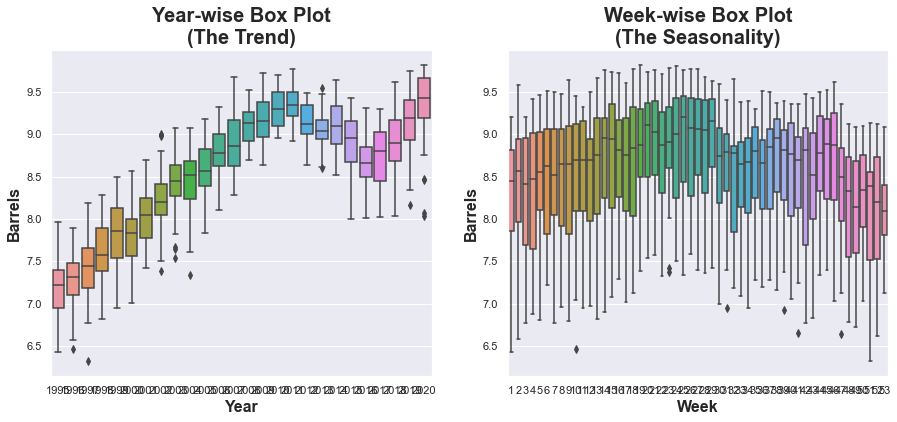

In [40]:
variable = 'Barrels'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(us_gasoline.index.week, us_gasoline[variable], hue=us_gasoline.index.year)
ax.set_title('Seasonal plot of Bricks', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Barrels', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(us_gasoline.index.year ,us_gasoline[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Barrels', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(us_gasoline.index.week, us_gasoline[variable], ax=ax[1])
ax[1].set_title('Week-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Barrels', fontsize = 16, fontdict=dict(weight='bold'))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


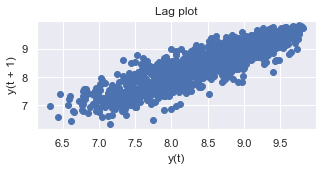

In [41]:
#lag plot
s=pd.Series(us_gasoline['Barrels'],index=us_gasoline.index)
pd.plotting.lag_plot(s, lag=1)
plt.title("Lag plot")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()

**Analysis of data set** 
> This data set shows a very strong upward trend throughout the data, there is only one point where the trend seems to slow down and thats from 2012 to 2019ish. There dose not seem to be a weekly seaonality in the data except that the middle of the year is slightly higher than the rest. This is probably due to people doing more travling during the summer time. There is no visible cycles in this data set 

## Question 11 

In [42]:
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/aus_livestock.rda")
print(result.keys()) 
livestock=result["aus_livestock"]

options = ["Pigs"]
livestock = livestock.loc[livestock['Animal'].isin(options)]
#cost to int
#livestock["Mont"] = pbs["Cost"].astype(int)

# amount of missing data
print("Missing values = " + str(livestock.isnull().sum()))

#livestock = livestock.drop(['Animal'])

livestock


odict_keys(['aus_livestock'])
Missing values = Month     0
Animal    0
State     0
Count     0
dtype: int64


,Month,Animal,State,Count
20436,912.0,Pigs,Australian Capital Territory,1700.0
20437,943.0,Pigs,Australian Capital Territory,1500.0
20438,974.0,Pigs,Australian Capital Territory,1700.0
20439,1004.0,Pigs,Australian Capital Territory,1500.0
20440,1035.0,Pigs,Australian Capital Territory,2000.0
...,...,...,...,...
24895,17744.0,Pigs,Western Australia,66000.0
24896,17775.0,Pigs,Western Australia,74900.0
24897,17805.0,Pigs,Western Australia,62000.0
24898,17836.0,Pigs,Western Australia,61600.0


In [43]:
list(set(list(livestock['State'])))


['Tasmania',
 'Victoria',
 'South Australia',
 'Northern Territory',
 'New South Wales',
 'Western Australia',
 'Queensland',
 'Australian Capital Territory']

In [44]:
date= []
for i in range(8):
    date.append(pd.date_range("1972-01-01", periods=558, freq="m"))
    
date # created a nested list for index

flat_list = [item for sublist in date for item in sublist] # must flatten the list using comprehention
flat_list


[Timestamp('1972-01-31 00:00:00', freq='M'),
 Timestamp('1972-02-29 00:00:00', freq='M'),
 Timestamp('1972-03-31 00:00:00', freq='M'),
 Timestamp('1972-04-30 00:00:00', freq='M'),
 Timestamp('1972-05-31 00:00:00', freq='M'),
 Timestamp('1972-06-30 00:00:00', freq='M'),
 Timestamp('1972-07-31 00:00:00', freq='M'),
 Timestamp('1972-08-31 00:00:00', freq='M'),
 Timestamp('1972-09-30 00:00:00', freq='M'),
 Timestamp('1972-10-31 00:00:00', freq='M'),
 Timestamp('1972-11-30 00:00:00', freq='M'),
 Timestamp('1972-12-31 00:00:00', freq='M'),
 Timestamp('1973-01-31 00:00:00', freq='M'),
 Timestamp('1973-02-28 00:00:00', freq='M'),
 Timestamp('1973-03-31 00:00:00', freq='M'),
 Timestamp('1973-04-30 00:00:00', freq='M'),
 Timestamp('1973-05-31 00:00:00', freq='M'),
 Timestamp('1973-06-30 00:00:00', freq='M'),
 Timestamp('1973-07-31 00:00:00', freq='M'),
 Timestamp('1973-08-31 00:00:00', freq='M'),
 Timestamp('1973-09-30 00:00:00', freq='M'),
 Timestamp('1973-10-31 00:00:00', freq='M'),
 Timestamp

In [45]:
#create index 
livestock.set_index(['State',flat_list])
livestock['Month'] = flat_list
livestock


,Month,Animal,State,Count
20436,1972-01-31,Pigs,Australian Capital Territory,1700.0
20437,1972-02-29,Pigs,Australian Capital Territory,1500.0
20438,1972-03-31,Pigs,Australian Capital Territory,1700.0
20439,1972-04-30,Pigs,Australian Capital Territory,1500.0
20440,1972-05-31,Pigs,Australian Capital Territory,2000.0
...,...,...,...,...
24895,2018-02-28,Pigs,Western Australia,66000.0
24896,2018-03-31,Pigs,Western Australia,74900.0
24897,2018-04-30,Pigs,Western Australia,62000.0
24898,2018-05-31,Pigs,Western Australia,61600.0


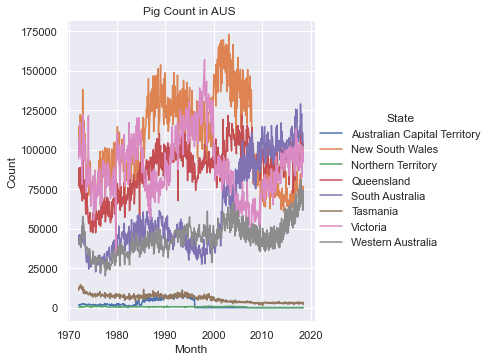

In [46]:
sns.relplot(
    data=livestock,
    x='Month', y="Count",
    hue="State", 
    #col="align",
    kind="line",
    #facet_kws=dict(sharex=False),
)
plt.title('Pig Count in AUS ')
plt.show()


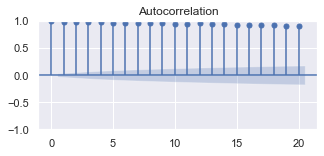

In [47]:
plot_acf(livestock['Count'], lags=20)
plt.show()


In [48]:
#1990-1995
earlyninties = livestock[4121:4194]


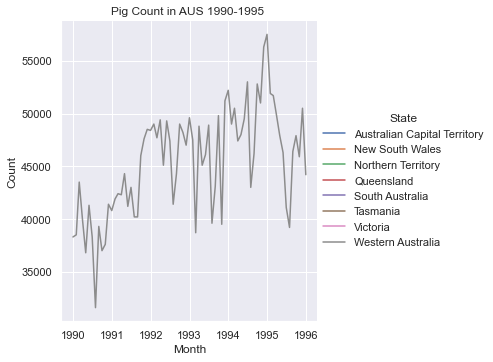

In [49]:
sns.relplot(
    data=earlyninties,
    x='Month', y="Count",
    hue="State", 
    #col="align",
    kind="line",
    #facet_kws=dict(sharex=False),
)
plt.title('Pig Count in AUS 1990-1995 ')
plt.show()


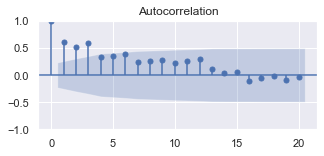

In [50]:
plot_acf(earlyninties['Count'], lags=20)
plt.show()



> in the 5 year time period there data is not very diffrent from white noise only The first 3 lags are signficant. based on the way the data is cut there is a small trend that can be seen in the plot but its not very strong. I f we cut the data a few months later it could be completely indsidtinguisable from white noise. 

## 3.7  Exercises

### Question 1 

In [51]:
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/global_economy.rda")
print(result.keys()) 
ge =result["global_economy"]
print("Missing values = " + str(ge.isnull().sum()))
ge


odict_keys(['global_economy'])
Missing values = Country          0
Code             0
Year             0
GDP           3322
Growth        3756
CPI           7480
Imports       4554
Exports       4563
Population       3
dtype: int64


,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960.0,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961.0,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962.0,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963.0,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964.0,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0
...,...,...,...,...,...,...,...,...,...
15145,Zimbabwe,ZWE,2013.0,1.909102e+10,1.989493,109.079488,36.668735,21.987759,15054506.0
15146,Zimbabwe,ZWE,2014.0,1.949552e+10,2.376929,108.847215,33.741470,20.930146,15411675.0
15147,Zimbabwe,ZWE,2015.0,1.996312e+10,1.779873,106.224541,37.588635,19.160176,15777451.0
15148,Zimbabwe,ZWE,2016.0,2.054868e+10,0.755869,104.560626,31.275493,19.943532,16150362.0


In [52]:
ge["Year"]=ge["Year"].astype(int)
ge.set_index(['Country',"Year"])


Code           GDP    Growth         CPI    Imports  \
Country     Year                                                       
Afghanistan 1960  AFG  5.377778e+08       NaN         NaN   7.024793   
            1961  AFG  5.488889e+08       NaN         NaN   8.097166   
            1962  AFG  5.466667e+08       NaN         NaN   9.349593   
            1963  AFG  7.511112e+08       NaN         NaN  16.863910   
            1964  AFG  8.000000e+08       NaN         NaN  18.055555   
...               ...           ...       ...         ...        ...   
Zimbabwe    2013  ZWE  1.909102e+10  1.989493  109.079488  36.668735   
            2014  ZWE  1.949552e+10  2.376929  108.847215  33.741470   
            2015  ZWE  1.996312e+10  1.779873  106.224541  37.588635   
            2016  ZWE  2.054868e+10  0.755869  104.560626  31.275493   
            2017  ZWE  2.204090e+10  4.704035  105.511849  30.370273   

                    Exports  Population  
Country     Year                         
Afghanistan 1960   4.132233   8996351.0  
            1961   4.453443   9166764.0  
            1962   4.878051   9345868.0  
            1963   9.171601   9533954.0  
            1964   8.888893   9731361.0  
...                     ...         ...  
Zimbabwe    2013  21.987759  15054506.0  
            2014  20.930146  15411675.0  
            2015  19.160176  15777451.0  
            2016  19.943532  16150362.0  
            2017  19.658023  16529904.0  

[15150 rows x 7 columns]

In [53]:
ge["percapGDP"]= ge["GDP"]/ge['Population']


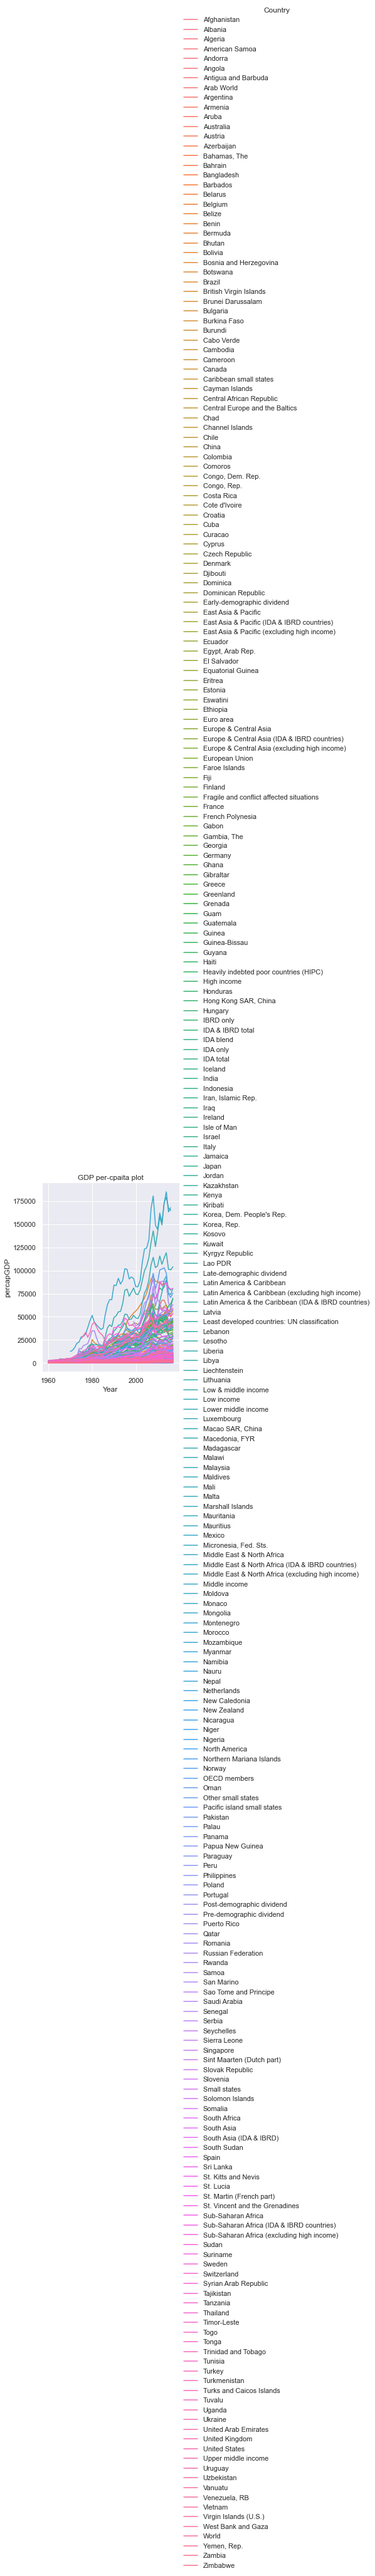

In [54]:
sns.relplot(
    data=ge,
    x='Year', y="percapGDP",
    hue="Country", 
    #col="align",
    kind="line",
    #facet_kws=dict(sharex=False),
)
plt.title('GDP per-cpaita plot')
plt.show()


In [55]:
ge.loc[ge['percapGDP'].idxmax()]


Country                Monaco
Code                      MCO
Year                     2014
GDP           7060236168.2367
Growth               7.179637
CPI                       NaN
Imports                   NaN
Exports                   NaN
Population            38132.0
percapGDP       185152.527227
Name: 9502, dtype: object

> The data set did not orginally come with a GDP per-capita variable. GDP per-capita was created by dividing the GDP by the populatioin.  Monaco has the highest GDP per-capita. Monaco looks like it sarted to have a massive growth in wealth during the 80s. In the early 80s Monaco was a normal country but then there was a very fast growth in wealth that has propelled it to the top of the world 

### Question 3 

In [56]:
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/canadian_gas.rda")
print(result.keys()) 
cgas =result["canadian_gas"]


dti = pd.date_range("1975-01-01", periods=542, freq="m")
#set new index 
cgas.set_index(dti,inplace=True)


cgas=cgas.drop(['Month'],axis=1)

print("Missing values = " + str(cgas.isnull().sum()))
cgas


odict_keys(['canadian_gas'])
Missing values = Volume    0
dtype: int64


,Volume
1975-01-31,1.4306
1975-02-28,1.3059
1975-03-31,1.4022
1975-04-30,1.1699
1975-05-31,1.1161
...,...
2019-10-31,17.8268
2019-11-30,17.8322
2019-12-31,19.4526
2020-01-31,19.5284


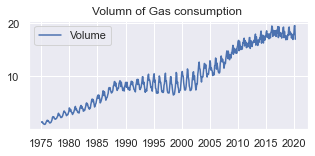

In [57]:
#line plot 
sns.lineplot(data=cgas)
plt.title("Volumn of Gas consumption ")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()


> There is non constant variance in the data. The Variance starts out small then gets very large in the middel of the data set then it shrinks agian. This is a problem becaue most models assume constant variance, meaing there wil be points where our forcast will be off cause of the variance.The Box-Cox would be a good option here to standardize the variance.

## Question 7

In [58]:
# load in the data 
result = pyreadr.read_r("/Users/averydavis/Desktop/Predictive_Analytics_Forecasting/aus_production.rda")
print(result.keys()) # check the objects  
aus_gas=result["aus_production"]

dti = pd.date_range("1966-01-01", periods=218, freq="q")
#set new index 
aus_gas.set_index(dti,inplace=True)

# drop usless information
aus_gas = aus_gas.drop(['Quarter', 'Beer',"Tobacco","Cement","Electricity","Bricks"], axis=1)

aus_gas=aus_gas[197:218]#last 5 years
aus_gas


odict_keys(['aus_production'])


,Gas
2015-06-30,206.0
2015-09-30,221.0
2015-12-31,180.0
2016-03-31,171.0
2016-06-30,224.0
2016-09-30,233.0
2016-12-31,192.0
2017-03-31,187.0
2017-06-30,234.0
2017-09-30,245.0


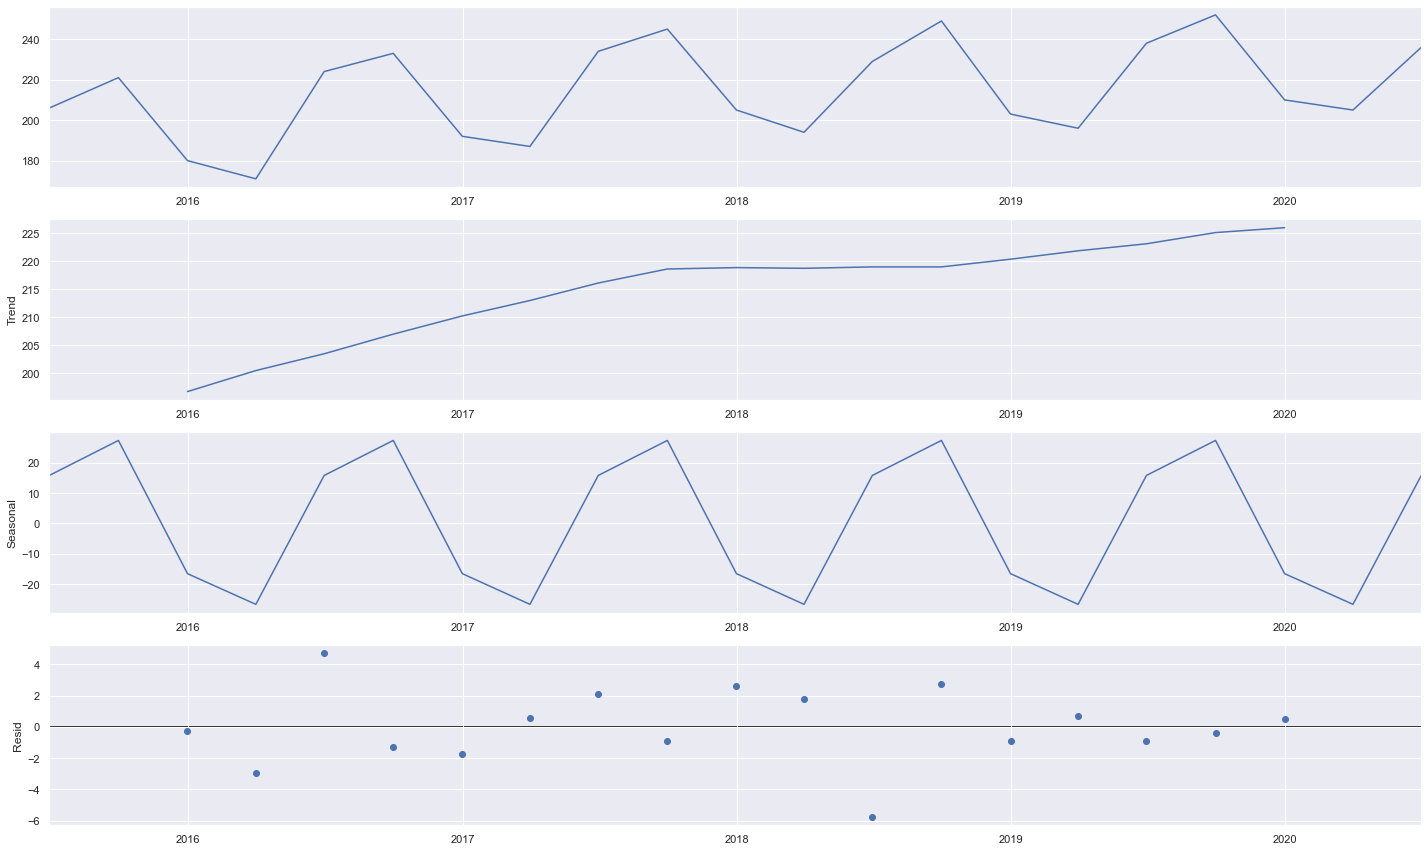

In [59]:
#seasonal decompostion


decompose_result_mult = seasonal_decompose(aus_gas, model="Multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.rcParams["figure.figsize"] = (20,12)
decompose_result_mult.plot();


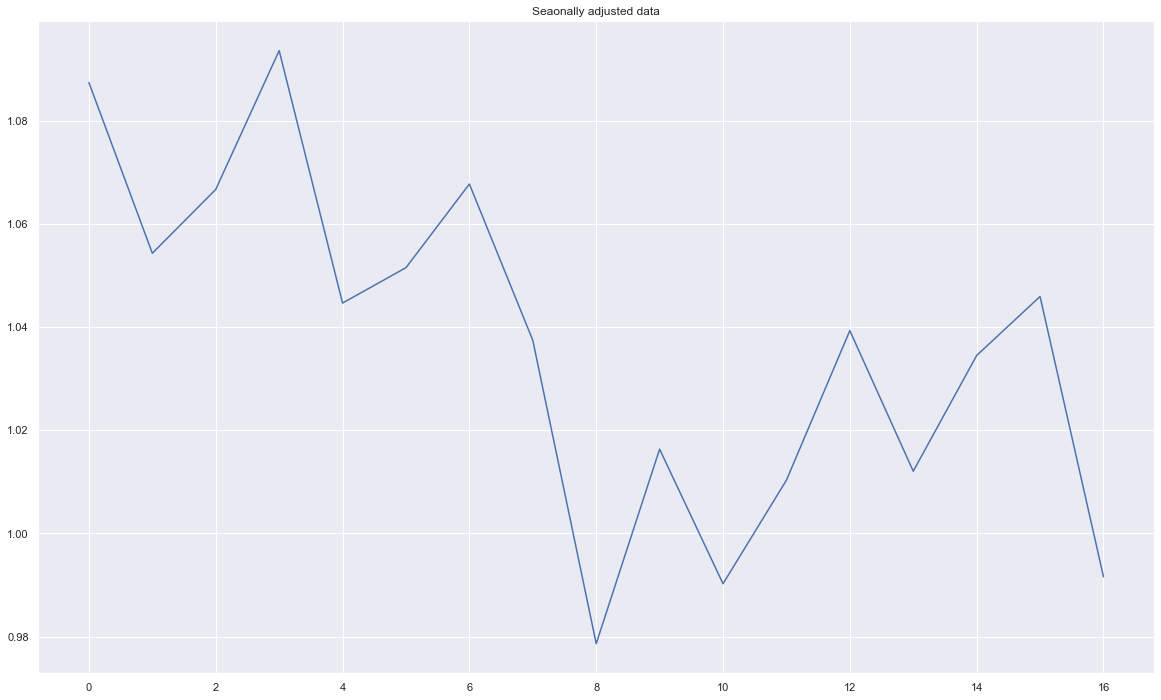

In [60]:

from pandas import read_csv


X = aus_gas.values
diff = list()
quarter = 4
for i in range(quarter, len(X)):
    value = X[i] / X[i - quarter]
    diff.append(value)
    
plt.plot(diff)
plt.title("Seaonally adjusted data")
plt.show()


In [61]:
# Outlier placed at 18

aus_gas.loc[18:19,['Gas']] = 350
dti = pd.date_range("2015-01-01", periods=21, freq="q")
#set new index 
aus_gas.set_index(dti,inplace=True)

aus_gas


,Gas
2015-03-31,206.0
2015-06-30,221.0
2015-09-30,180.0
2015-12-31,171.0
2016-03-31,224.0
2016-06-30,233.0
2016-09-30,192.0
2016-12-31,187.0
2017-03-31,234.0
2017-06-30,245.0


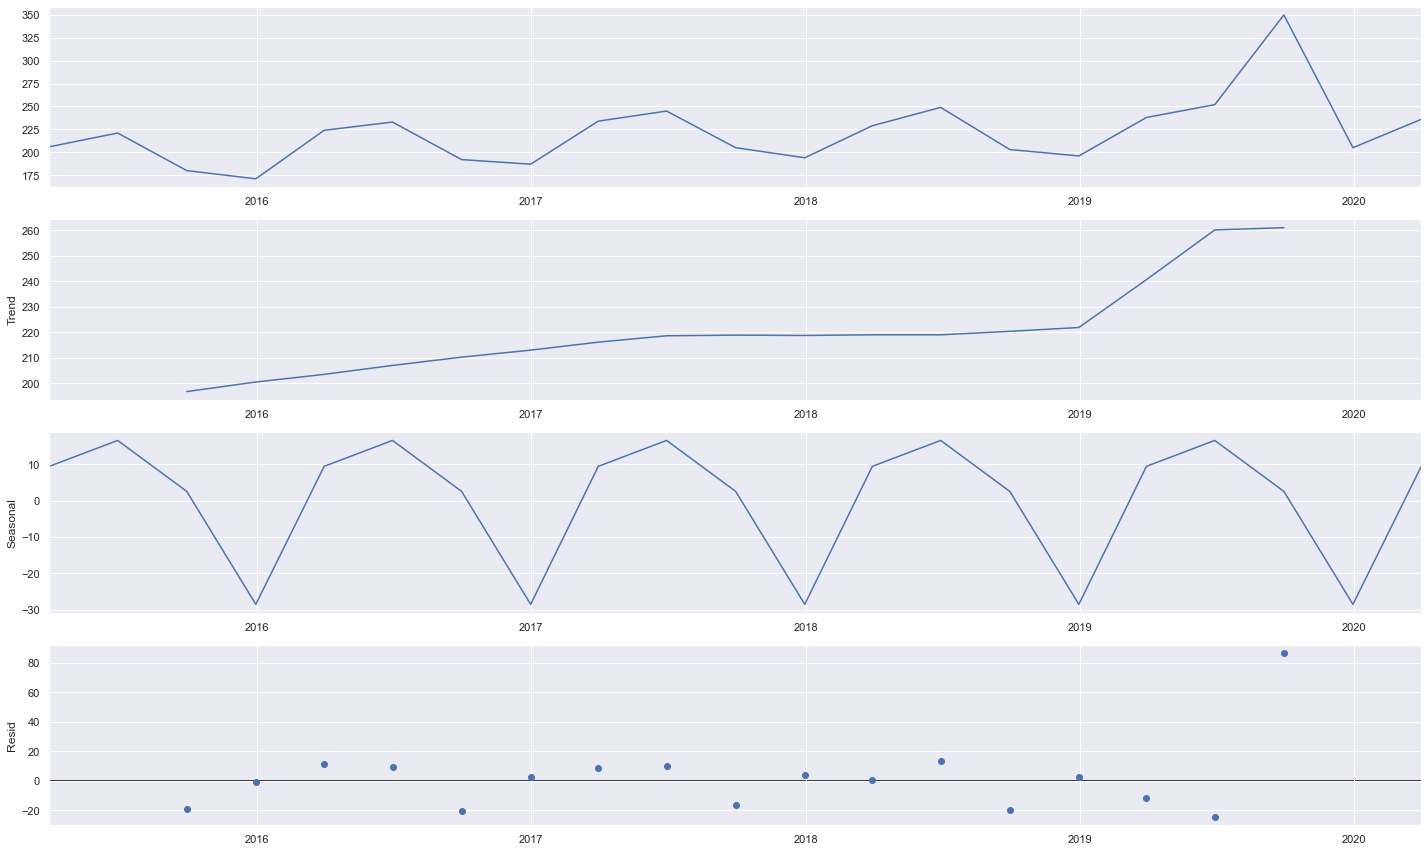

In [62]:
#seasonal decompostion with outlier 


decompose_result_mult = seasonal_decompose(aus_gas, model="Multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.rcParams["figure.figsize"] = (20,12)
decompose_result_mult.plot();


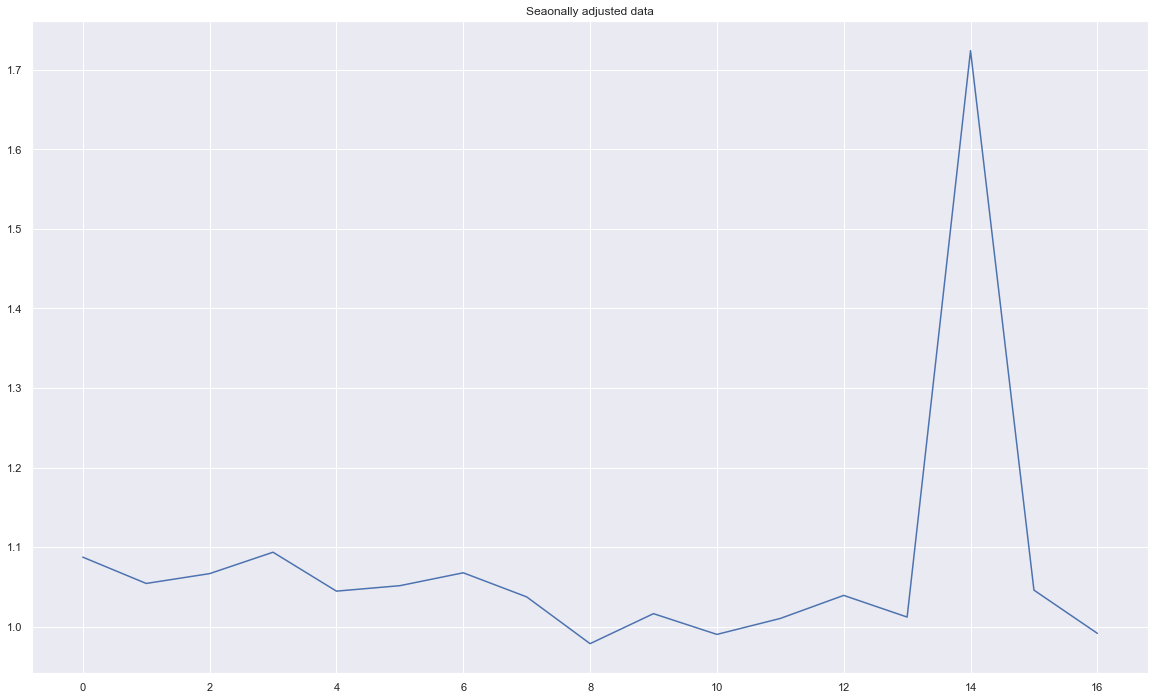

In [63]:
# seasonal adjustment with outlier
from pandas import read_csv
from matplotlib import pyplot

X = aus_gas.values
diff = list()
quarter = 4
for i in range(quarter, len(X)):
    value = X[i] / X[i - quarter]
    diff.append(value)
    
plt.plot(diff)
plt.title("Seaonally adjusted data")
plt.show()


> The outlier of 350 was placed toward the end of the data set. This caused the seasonally adjusted data to look a bit diffrent, it almost totally changed the trend here. Also it has changed the shape of the seasonal portion of the decompostion to a much more rounded one. When the outlier was in the middle of the data set there was a much smaller impact on decompostion. This means that the cutting of the data is very important for understanding the data. There may be cuts of the data that could miss lead, for example if you cut the data at the top of a seson there will be a much diffrent interpertation of the trend. 